# Find distribution of local maxima in a Gaussian Random Field

## Apply formula of Cheng&Schwartzman 

1. Below I defined the formulae of Cheng&Schwartzman in arXiv:1503.01328v1.  On page 3.3 the density functions are displayed for 1D, 2D and 3D. 
2. Consequently, I apply these formulae to a range of x-values, which should enable us to reproduce Figure 1.  This however does not succeed for 3D!

In [138]:
def peakdens1D(x,k):
    f1 = (3-k**2)**(0.5)/(6*math.pi)**0.5 * np.exp(-3*x**2/(2*(3-k**2)))
    f2 = 2*k*x*math.pi**0.5/6**0.5*stats.norm.pdf(x)*stats.norm.cdf(k*x/(3-k**2)**0.5)
    out = f1+f2
    return out

def peakdens2D(x,k):
    f1 = 3**0.5*k**2*(x**2-1)*stats.norm.pdf(x)*stats.norm.cdf(k*x/(2-k**2)**0.5)
    f2 = k*x*(3*(2-k**2))**0.5/(2*math.pi) * np.exp(-x**2/(2-k**2))
    f3 = 6**0.5/(math.pi*(3-k**2))**0.5 * np.exp(-3*x**2/(2*(3-k**2)))
    f4 = stats.norm.cdf(k*x/((3-k**2)*(2-k**2))**0.5)
    out = f1 + f2 + f3*f4
    return out

def peakdens3D(x,k):
    f1 = 144*stats.norm.pdf(x)/(29*6**(0.5)-36)
    f211 = k**2.*((1.-k**2.)**3. + 6.*(1.-k**2.)**2. + 12.*(1.-k**2.)+24.)*x**2. / (4.*(3.-k**2.)**2.)
    f212 = 2.*(1.-k**2.)**3. + 3.*(1.-k**2.)**2.+6.*(1.-k**2.) / (4.*(3.-k**2.))
    f213 = 3./2.
    f21 = f211 + f212 + f213
    f22 = np.exp(-k**2.*x**2./(2.*(3.-k**2.))) / (2.*(3.-k**2.))**(0.5) 
    f23 = stats.norm.cdf(2.*k*x / ((3.-k**2.)*(5.-3.*k**2.))**(0.5))
    f2 = f21*f22*f23
    f31 = (k**2.*(2.-k**2.))/4.*x**2. - k**2.*(1.-k**2.)/2. - 1.
    f32 = np.exp(-k**2.*x**2./(2.*(2.-k**2.))) / (2.*(2.-k**2.))**(0.5) 
    f33 = stats.norm.cdf(k*x / ((2.-k**2.)*(5.-3.*k**2.))**(0.5))
    f3 = f31 * f32 * f33
    f41 = 7.-k**2. + (1.-k**2.)*(3.*(1.-k**2.)**2. + 12.*(1.-k**2.) + 28.)/(2.*(3.-k**2.))
    f42 = k*x*np.exp(-3.*k**2.*x**2/(2.*(5-3.*k**2.))) / (4.*math.pi**(0.5)*(3.-k**2.)*(5.-3.*k**2.)*(0.5))
    f4 = f41*f42
    f51 = math.pi*(0.5)*k**3./4.*x*(x**2.-3.)
    f521low = np.array([-10.,-10.])
    f521up = np.array([0.,k*x/2.**(0.5)])
    f521mu = np.array([0.,0.])
    f521sigma = np.array([[3./2., -1.],[-1.,(3.-k**2.)/2.]])
    f521,i = stats.mvn.mvnun(f521low,f521up,f521mu,f521sigma) 
    f522low = np.array([-10.,-10.])
    f522up = np.array([0.,k*x/2.*(0.5)])
    f522mu = np.array([0.,0.])
    f522sigma = np.array([[3./2., -1./2.],[-1./2.,(2.-k**2.)/2.]])
    f522,i = stats.mvn.mvnun(f522low,f522up,f522mu,f522sigma) 
    f5 = f51*(f521+f522)
    out = f1*(f2+f3+f4+f5)
    return out

In [139]:
xs = np.arange(-4,4,0.01).tolist()
ys_3d_k01 = []
ys_3d_k05 = []
ys_3d_k1 = []
ys_2d_k01 = []
ys_2d_k05 = []
ys_2d_k1 = []
ys_1d_k01 = []
ys_1d_k05 = []
ys_1d_k1 = []

for x in xs:
    ys_1d_k01.append(peakdens1D(x,0.1))
    ys_1d_k05.append(peakdens1D(x,0.5))
    ys_1d_k1.append(peakdens1D(x,1))
    ys_2d_k01.append(peakdens2D(x,0.1))
    ys_2d_k05.append(peakdens2D(x,0.5))
    ys_2d_k1.append(peakdens2D(x,1))
    ys_3d_k01.append(peakdens3D(x,0.1))
    ys_3d_k05.append(peakdens3D(x,0.5))
    ys_3d_k1.append(peakdens3D(x,1))

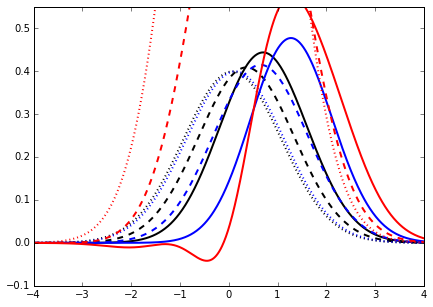

In [142]:
plt.figure(figsize=(7,5))
plt.plot(xs,ys_1d_k01,color="black",ls=":",lw=2)
plt.plot(xs,ys_1d_k05,color="black",ls="--",lw=2)
plt.plot(xs,ys_1d_k1,color="black",ls="-",lw=2)
plt.plot(xs,ys_2d_k01,color="blue",ls=":",lw=2)
plt.plot(xs,ys_2d_k05,color="blue",ls="--",lw=2)
plt.plot(xs,ys_2d_k1,color="blue",ls="-",lw=2)
plt.plot(xs,ys_3d_k01,color="red",ls=":",lw=2)
plt.plot(xs,ys_3d_k05,color="red",ls="--",lw=2)
plt.plot(xs,ys_3d_k1,color="red",ls="-",lw=2)
plt.ylim([-0.1,0.55])
plt.show()